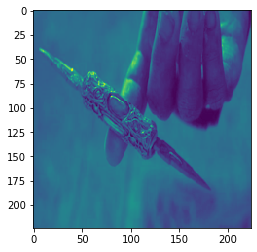

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch
import time
from torch.autograd import Variable
panda = np.array(Image.open('E:/picture/mieba.jpg').resize((224, 224)))
panda_tensor = torch.from_numpy(panda)
panda_tensor.size()

plt.imshow(panda[:, :, 0])

In [2]:
sales = torch.eye(3, 3)
print(type(sales))
print(sales)

<class 'torch.Tensor'>
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


In [3]:
a = torch.rand(2, 2)
b = torch.rand(2, 2)
c = a + b
d = torch.add(a, b)
print(a, '\n', b, '\n', c, '\n', d)

a.add_(5)
print(a)

tensor([[0.3716, 0.2052],
        [0.5251, 0.9738]]) 
 tensor([[0.9610, 0.5311],
        [0.7201, 0.2762]]) 
 tensor([[1.3326, 0.7363],
        [1.2452, 1.2500]]) 
 tensor([[1.3326, 0.7363],
        [1.2452, 1.2500]])
tensor([[5.3716, 5.2052],
        [5.5251, 5.9738]])


In [4]:
a = torch.rand(10000, 10000)
b = torch.rand(10000, 10000)
pre_time = time.time()
a.matmul(b)
print(time.time() - pre_time)

pre_time = time.time()
a = a.cuda()
b = b.cuda()
a.matmul(b)
print(time.time() - pre_time)

15.726979494094849
2.4740383625030518


In [146]:
# 2.2.2
def get_data():
    train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
    train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
    dtype = torch.FloatTensor
    X = Variable(torch.from_numpy(train_X).type(dtype), requires_grad = True).view(17, 1)
    y = Variable(torch.from_numpy(train_Y).type(dtype), requires_grad = True).view(17, 1)
    return X, y

def get_weights():
    w = Variable(torch.randn(1), requires_grad = True)
    b = Variable(torch.randn(1), requires_grad = True)
    return w, b

def simple_network(x):
    y_pred = torch.matmul(x, w) + b
    return y_pred

def loss_fn(y, y_pred):
    loss = (y - y_pred).pow(2).sum()
    for param in [w, b]:
        if not param.grad is None:
            param.grad.data.zero_()
    loss.backward()
    return loss.item()

def loss_fn_book(y,y_pred):
    loss = (y_pred-y).pow(2).sum()
    for param in [w, b]:
        if not param.grad is None: param.grad.data.zero_()
    loss.backward()
    return loss.data[0]

def optimize(learning_rate):
#     print (w.grad.data)
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data

def plot_variable(x,y,y_pred, z = ''):
    print(x.data.numpy().shape,y.data.numpy().shape)  
    plt.scatter(x.data.numpy().reshape(-1),y.data.numpy().reshape(-1))
    plt.plot(x.data.numpy().reshape(-1),y_pred.data.numpy().reshape(-1),z,'Fitted line')
    plt.yticks(np.arange(1.0, 5.0, 0.5))
    plt.show()  


<class 'torch.Tensor'> <class 'torch.Tensor'>
1e-05
51302.19
(17, 1) (17, 1)


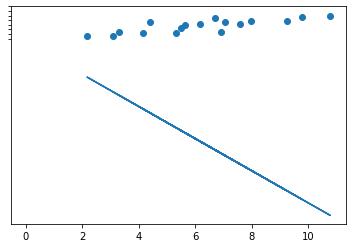

220.29
(17, 1) (17, 1)


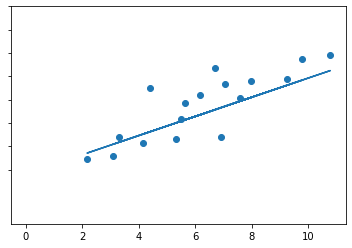

215.17
(17, 1) (17, 1)


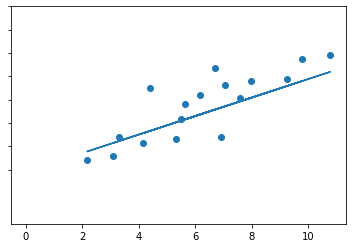

210.40
(17, 1) (17, 1)


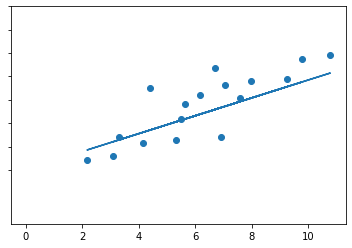

205.95
(17, 1) (17, 1)


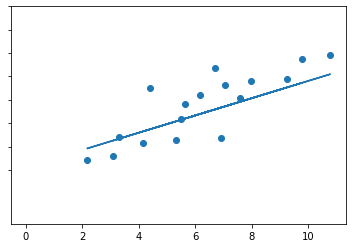

201.80
(17, 1) (17, 1)


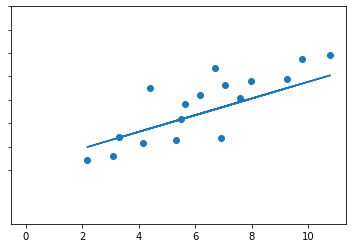

197.94
(17, 1) (17, 1)


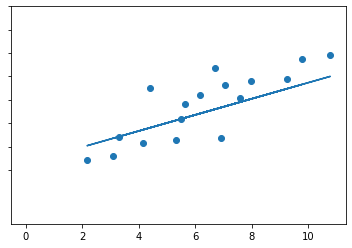

194.34
(17, 1) (17, 1)


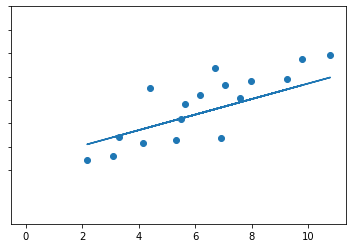

190.98
(17, 1) (17, 1)


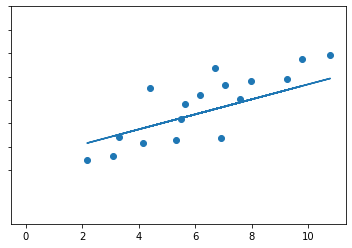

187.85
(17, 1) (17, 1)


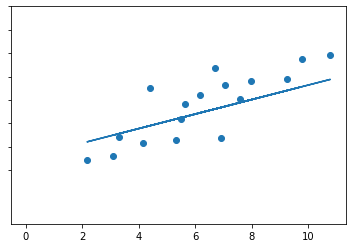

(17, 1) (17, 1)


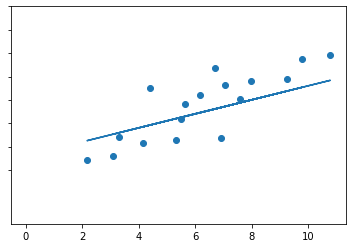

In [150]:
x, y = get_data()
print(type(x), type(y))
w, b = get_weights()
learning_rate = 1e-5
print (learning_rate)
for i in range(500):
    y_pred = simple_network(x)
    loss = loss_fn(y, y_pred)
#     print (w.grad.data)
    if i % 50 == 0:
        print ("%.2f" % (loss))
#         print (w.detach().numpy().tolist(), b.detach().numpy().tolist())
#         print (x.detach().numpy().tolist(), '\n\n', y.detach().numpy().tolist())
#         print (w, b)
#         print(type(x), type(y))
#         x_numpy = x.data.numpy()
        plot_variable(x,y,y_pred)
    optimize(learning_rate)
plot_variable(x,y,y_pred)